# MLP
Cell line 01 H1.hESC

This notebook uses
lncRNA, canonical, no middle-exclusion, GMM, learning module.

There was no learn fail during CV.

MCC mean 0.2912

In [1]:
SEED = 43
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-05-01 21:23:46.846606


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = 'hESC_mlp'
SAVE_DESCRIM_FILENAME = 'hESC_gmm'
LOAD_MODEL_FILENAME = None # 'hESC_mlp.0.0..model'
LOAD_DESCRIM_FILENAME = None # 'hESC_gmm.0.0.pickle'

GPU device not found
Running on CoLab
Mounted at /content/drive/
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'RCI_GMM'  # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = -1  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = False
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = False
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = False
MIDDLE_LOW          = -2   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         = 0    #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.H1_RCI.csv'
RCI_FILE_TEST  = None # 'test.H1_RCI.csv'

SEQ_FILE_TRAIN = 'train.canon_H1_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_H1_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = []  # exclude nothing; input file has only 1 value not 15 per line   
print('Exclusions',EXCLUSIONS)

Exclusions []


In [6]:
from tensorflow import keras
from keras import models
import pickle

def save_model(model, discriminator, filename1, filename2):
    filepath = MODEL_DIR + filename1
    model.save(filepath)
    print('Saved model 1 to',filepath)
    filepath = MODEL_DIR + filename2
    pickle.dump(discriminator, open(filepath, 'wb'))
    print('Saved model 2 to',filepath)

def load_model(filename1, filename2):
    filepath = MODEL_DIR + filename1
    model = keras.models.load_model(filepath)
    print('Loaded model 1 from',filepath)
    filepath = MODEL_DIR + filename2
    discriminator = pickle.load(open(filepath, 'rb'))        
    print('Loaded model 2 from',filepath)
    return model, discriminator

2023-05-01 21:24:12.291706
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.H1_RCI.csv
Number of RCI values loaded 3735
Num RCI: 3735
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_H1_transcripts.csv
Loaded 3735 sequences.

Training # 1 1
2023-05-01 21:24:21.230763
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/h1.1.1.validation_genes.txt
Discriminator is GMM
Means [-1.5547555996115616, 0.3016911493653951]
Variances [1.61506612 1.52331574]
Priors [0.41692797 0.58307203]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
Train 1:0 1863:1125 62.35%
Computed class weights: {0: 1.328, 1: 0.8019323671497585}
Valid 1:0 473:274 63.32%
FIT


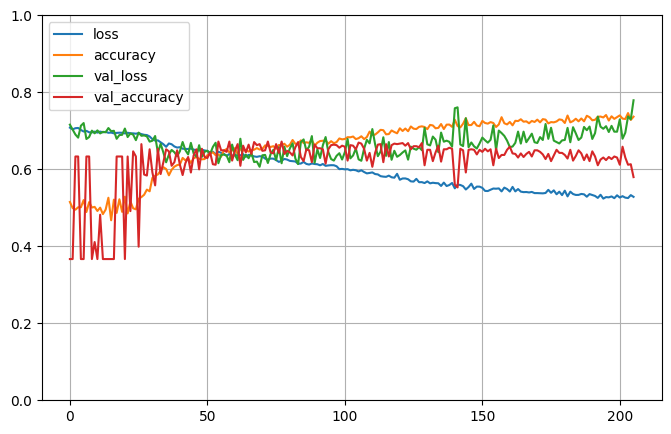

Saved model 1 to /content/drive/My Drive/data/Localization/Models/hESC_mlp.1.1.model
Saved model 2 to /content/drive/My Drive/data/Localization/Models/hESC_gmm.1.1.pickle

Testing # 1 1
2023-05-01 21:26:47.791331
PREDICT
Test 1:0 473:274 63.32%
Predict 1:0 482:265 64.52%
Test sizes (747, 1025) (747,)
Distrib of scores: 0.5603636 mean 0.20964447 std
Range of scores: 0.047832422 to 0.9505077
Score threshold 0.5
Confusion matrix
 [[146 128]
 [119 354]]
Normalized matrix
 [[0.19544846 0.17135207]
 [0.15930388 0.47389558]]
Extreme scores correct, pos:neg 243 84
Extreme scores incorrect pos:neg 65 55


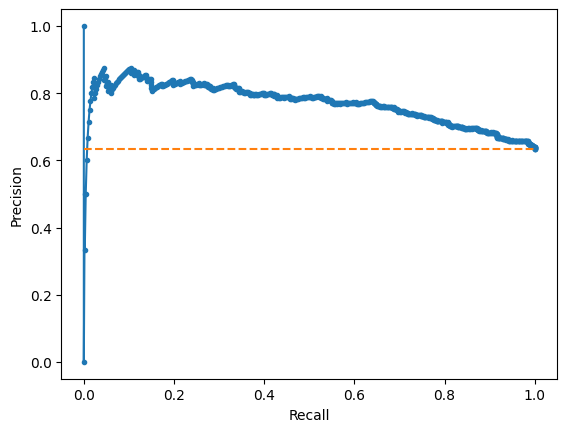

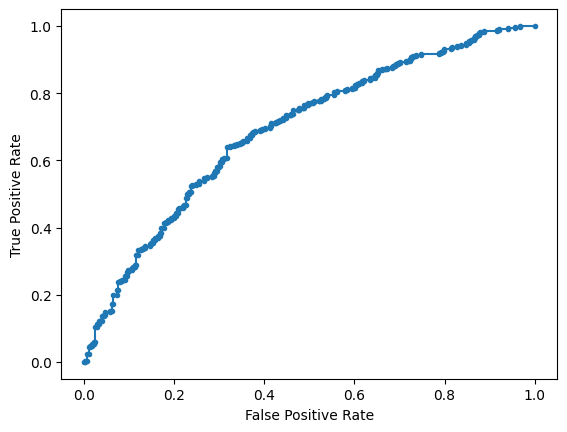

Accuracy: 66.93% Precision: 73.44% Recall: 74.84%
F1: 74.14% MCC: 0.2833
AUPRC: 76.90% AUROC: 69.10%
 accuracy [66.93440428380187]
 precision [73.44398340248964]
 recall [74.84143763213531]
 F1 [74.13612565445027]
 MCC [0.2833146640734218]
 AUPRC [76.895432257017]
 AUROC [69.09769910958164]

Training # 1 2
2023-05-01 21:26:48.675665
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/h1.1.2.validation_genes.txt
Discriminator is GMM
Means [-1.5388117043638918, 0.3310483416016673]
Variances [1.51461422 1.48671347]
Priors [0.42331606 0.57668394]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
Train 1:0 1816:1172 60.78%
Computed class weights: {0: 1.2747440273037542, 1: 0.8226872246696035}
Valid 1:0 474:273 63.45%
FIT


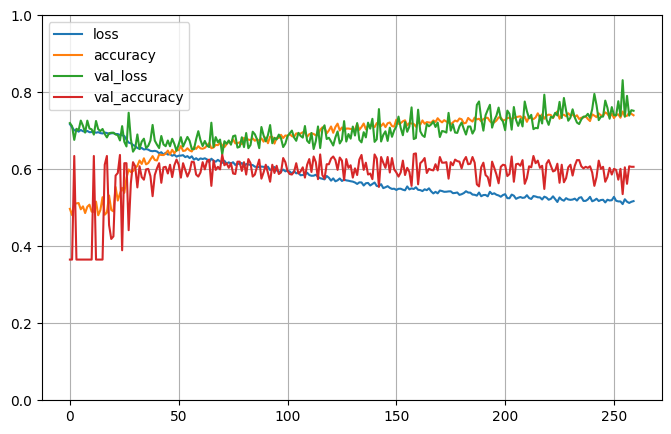

Saved model 1 to /content/drive/My Drive/data/Localization/Models/hESC_mlp.1.2.model
Saved model 2 to /content/drive/My Drive/data/Localization/Models/hESC_gmm.1.2.pickle

Testing # 1 2
2023-05-01 21:28:38.106977
PREDICT
Test 1:0 474:273 63.45%
Predict 1:0 520:227 69.61%
Test sizes (747, 1025) (747,)
Distrib of scores: 0.6170203 mean 0.22851357 std
Range of scores: 0.031293876 to 0.9846946
Score threshold 0.5
Confusion matrix
 [[116 157]
 [111 363]]
Normalized matrix
 [[0.15528782 0.21017403]
 [0.14859438 0.48594378]]
Extreme scores correct, pos:neg 278 63
Extreme scores incorrect pos:neg 113 55


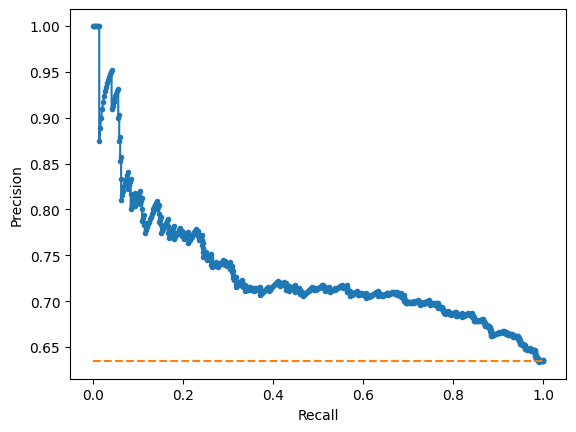

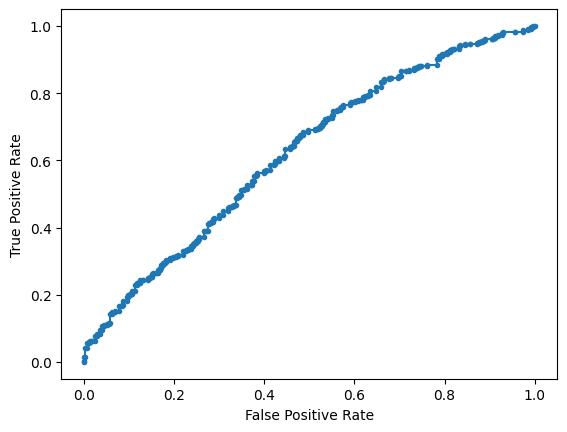

Accuracy: 64.12% Precision: 69.81% Recall: 76.58%
F1: 73.04% MCC: 0.1997
AUPRC: 73.15% AUROC: 62.17%
 accuracy [64.12315930388219]
 precision [69.8076923076923]
 recall [76.58227848101265]
 F1 [73.03822937625756]
 MCC [0.1996998125674496]
 AUPRC [73.15097558714601]
 AUROC [62.17369128761534]

Training # 1 3
2023-05-01 21:28:38.652224
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/h1.1.3.validation_genes.txt
Discriminator is GMM
Means [0.32265378440605624, -1.5730608913804627]
Variances [1.54604651 1.63132568]
Priors [0.59197604 0.40802396]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
Train 1:0 1882:1106 62.99%
Computed class weights: {0: 1.3508137432188065, 1: 0.793836344314559}
Valid 1:0 472:275 63.19%
FIT


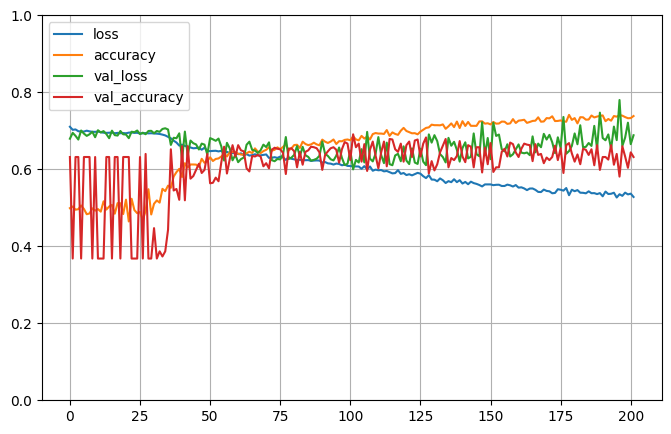

Saved model 1 to /content/drive/My Drive/data/Localization/Models/hESC_mlp.1.3.model
Saved model 2 to /content/drive/My Drive/data/Localization/Models/hESC_gmm.1.3.pickle

Testing # 1 3
2023-05-01 21:30:01.922182
PREDICT
Test 1:0 472:275 63.19%
Predict 1:0 545:202 72.96%
Test sizes (747, 1025) (747,)
Distrib of scores: 0.6070265 mean 0.17510511 std
Range of scores: 0.12529036 to 0.8993863
Score threshold 0.5
Confusion matrix
 [[123 152]
 [ 79 393]]
Normalized matrix
 [[0.16465863 0.20348059]
 [0.10575636 0.52610442]]
Extreme scores correct, pos:neg 274 54
Extreme scores incorrect pos:neg 87 25


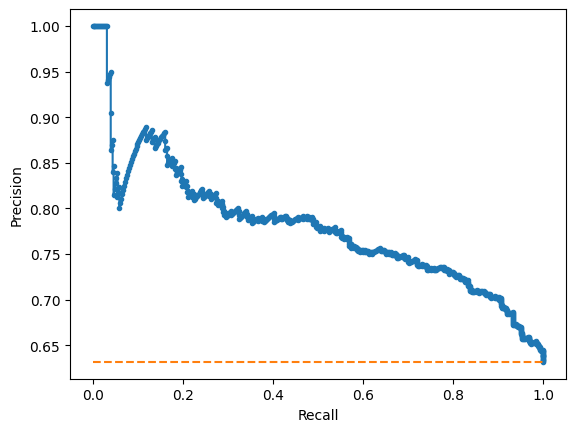

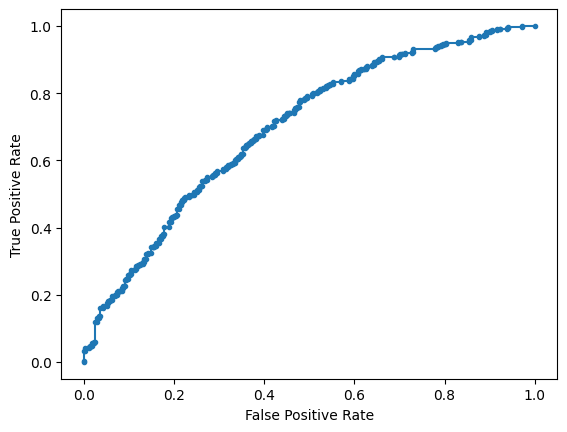

Accuracy: 69.08% Precision: 72.11% Recall: 83.26%
F1: 77.29% MCC: 0.3039
AUPRC: 77.94% AUROC: 69.60%
 accuracy [69.07630522088354]
 precision [72.11009174311927]
 recall [83.26271186440678]
 F1 [77.28613569321534]
 MCC [0.303924751140073]
 AUPRC [77.93792833824477]
 AUROC [69.60015408320494]

Training # 1 4
2023-05-01 21:30:02.425038
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/h1.1.4.validation_genes.txt
Discriminator is GMM
Means [-1.5116782620135425, 0.2840326693313854]
Variances [1.79292645 1.57335752]
Priors [0.41250692 0.58749308]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
Train 1:0 1907:1081 63.82%
Computed class weights: {0: 1.3820536540240518, 1: 0.7834294703723126}
Valid 1:0 463:284 61.98%
FIT


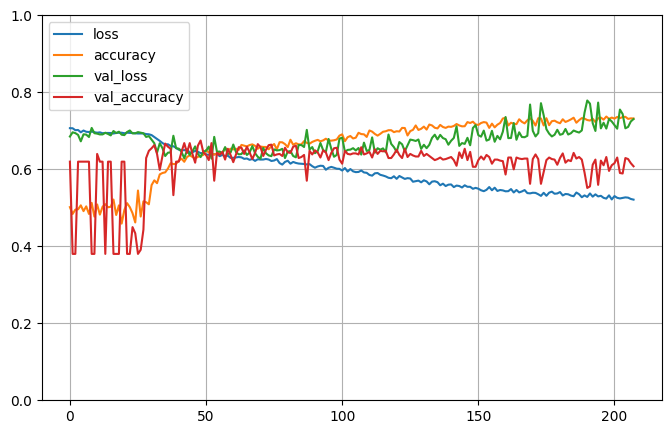

Saved model 1 to /content/drive/My Drive/data/Localization/Models/hESC_mlp.1.4.model
Saved model 2 to /content/drive/My Drive/data/Localization/Models/hESC_gmm.1.4.pickle

Testing # 1 4
2023-05-01 21:32:27.940694
PREDICT
Test 1:0 463:284 61.98%
Predict 1:0 531:216 71.08%
Test sizes (747, 1025) (747,)
Distrib of scores: 0.5869989 mean 0.17424518 std
Range of scores: 0.04197254 to 0.9330192
Score threshold 0.5
Confusion matrix
 [[122 162]
 [ 94 369]]
Normalized matrix
 [[0.16331995 0.21686747]
 [0.12583668 0.4939759 ]]
Extreme scores correct, pos:neg 232 52
Extreme scores incorrect pos:neg 81 33


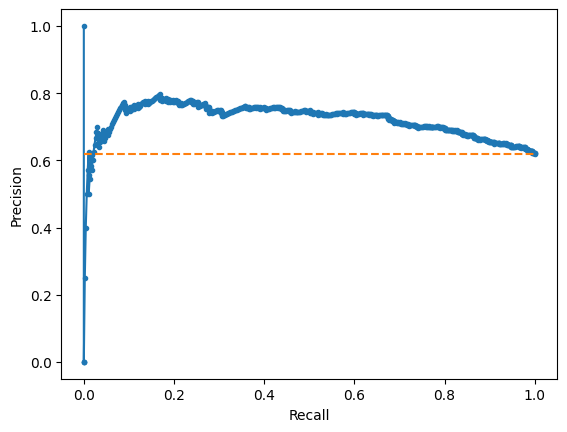

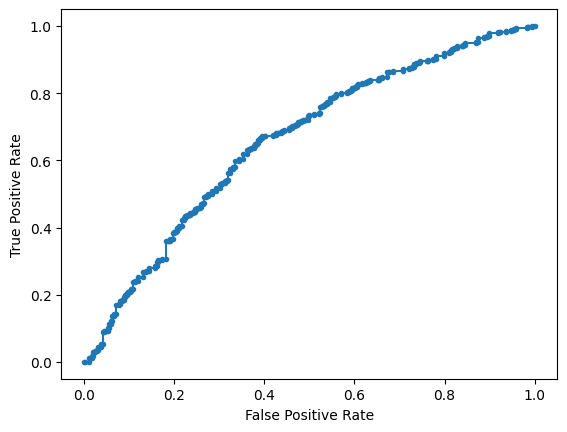

Accuracy: 65.73% Precision: 69.49% Recall: 79.70%
F1: 74.25% MCC: 0.2426
AUPRC: 71.91% AUROC: 65.80%
 accuracy [65.72958500669344]
 precision [69.49152542372882]
 recall [79.6976241900648]
 F1 [74.24547283702213]
 MCC [0.24257536948841826]
 AUPRC [71.90869145922414]
 AUROC [65.79867976759041]

Training # 1 5
2023-05-01 21:32:28.446555
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/h1.1.5.validation_genes.txt
Discriminator is GMM
Means [0.29476702895838147, -1.5790659645882081]
Variances [1.4324214  1.62854854]
Priors [0.60006406 0.39993594]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
Train 1:0 1911:1077 63.96%
Computed class weights: {0: 1.3871866295264623, 1: 0.7817896389324961}
Valid 1:0 463:284 61.98%
FIT


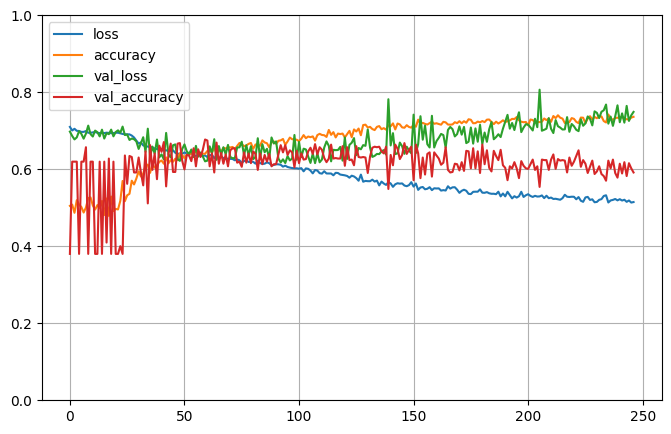

Saved model 1 to /content/drive/My Drive/data/Localization/Models/hESC_mlp.1.5.model
Saved model 2 to /content/drive/My Drive/data/Localization/Models/hESC_gmm.1.5.pickle

Testing # 1 5
2023-05-01 21:34:54.734320
PREDICT
Test 1:0 463:284 61.98%
Predict 1:0 523:224 70.01%
Test sizes (747, 1025) (747,)
Distrib of scores: 0.61941457 mean 0.22213489 std
Range of scores: 0.04608998 to 0.9774031
Score threshold 0.5
Confusion matrix
 [[130 154]
 [ 94 369]]
Normalized matrix
 [[0.17402945 0.20615797]
 [0.12583668 0.4939759 ]]
Extreme scores correct, pos:neg 286 66
Extreme scores incorrect pos:neg 103 38


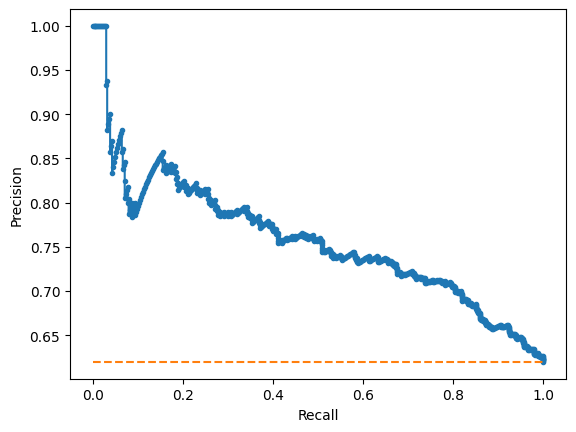

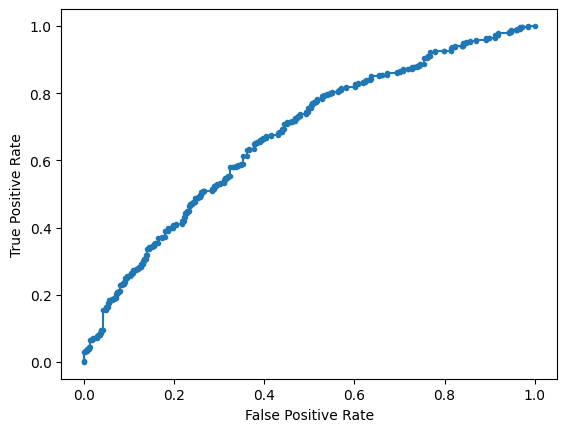

Accuracy: 66.80% Precision: 70.55% Recall: 79.70%
F1: 74.85% MCC: 0.2699
AUPRC: 75.76% AUROC: 67.31%
 accuracy [66.80053547523427]
 precision [70.55449330783938]
 recall [79.6976241900648]
 F1 [74.84787018255578]
 MCC [0.26986247359942894]
 AUPRC [75.75527651615774]
 AUROC [67.31055881726645]

Training # 2 1
2023-05-01 21:34:55.252751
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/h1.2.1.validation_genes.txt
Discriminator is GMM
Means [0.31716383297369743, -1.551943756471835]
Variances [1.53667452 1.64730461]
Priors [0.58881684 0.41118316]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
Train 1:0 1880:1108 62.92%
Computed class weights: {0: 1.348375451263538, 1: 0.7946808510638298}
Valid 1:0 468:279 62.65%
FIT


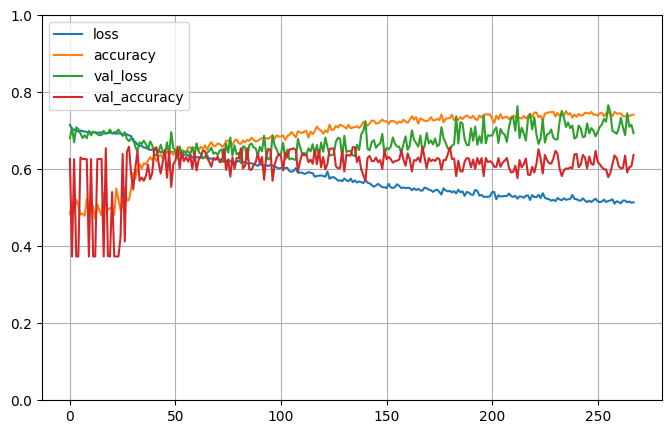

Saved model 1 to /content/drive/My Drive/data/Localization/Models/hESC_mlp.2.1.model
Saved model 2 to /content/drive/My Drive/data/Localization/Models/hESC_gmm.2.1.pickle

Testing # 2 1
2023-05-01 21:36:45.546304
PREDICT
Test 1:0 468:279 62.65%
Predict 1:0 549:198 73.49%
Test sizes (747, 1025) (747,)
Distrib of scores: 0.62401354 mean 0.21920645 std
Range of scores: 0.049265355 to 0.97066534
Score threshold 0.5
Confusion matrix
 [[111 168]
 [ 87 381]]
Normalized matrix
 [[0.14859438 0.2248996 ]
 [0.11646586 0.51004016]]
Extreme scores correct, pos:neg 285 66
Extreme scores incorrect pos:neg 106 37


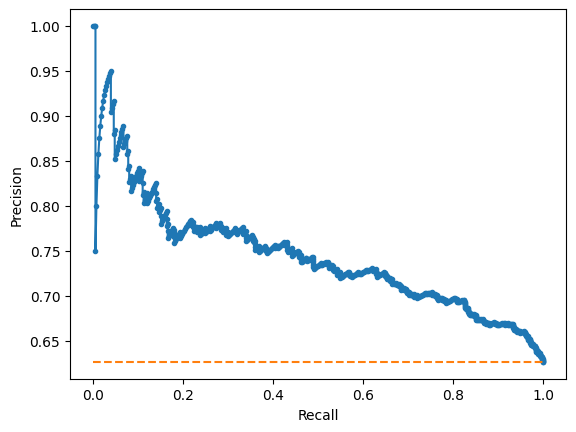

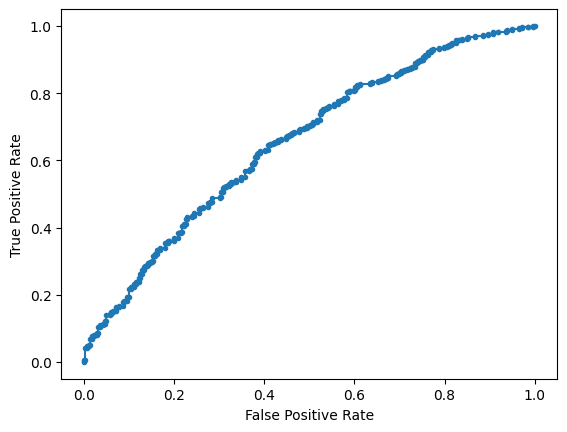

Accuracy: 65.86% Precision: 69.40% Recall: 81.41%
F1: 74.93% MCC: 0.2323
AUPRC: 74.44% AUROC: 65.33%
 accuracy [65.86345381526104]
 precision [69.39890710382514]
 recall [81.41025641025641]
 F1 [74.92625368731564]
 MCC [0.23229712456450843]
 AUPRC [74.43967693895372]
 AUROC [65.32640995006587]

Training # 2 2
2023-05-01 21:36:46.044138
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/h1.2.2.validation_genes.txt
Discriminator is GMM
Means [0.30098600729957314, -1.5625823494981423]
Variances [1.55030874 1.60188231]
Priors [0.58510693 0.41489307]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
Train 1:0 1855:1133 62.08%
Computed class weights: {0: 1.3186231244483673, 1: 0.8053908355795149}
Valid 1:0 485:262 64.93%
FIT


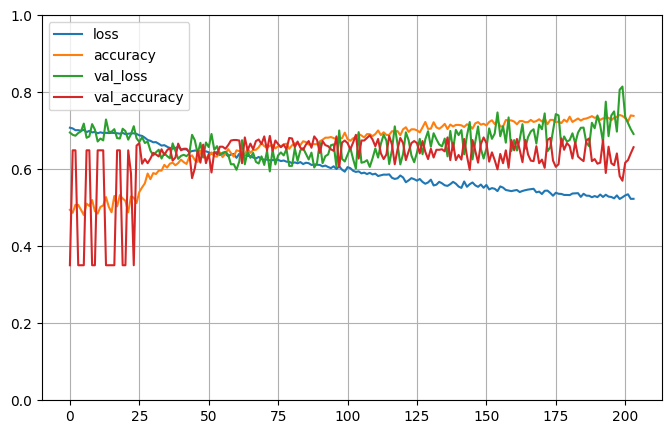

Saved model 1 to /content/drive/My Drive/data/Localization/Models/hESC_mlp.2.2.model
Saved model 2 to /content/drive/My Drive/data/Localization/Models/hESC_gmm.2.2.pickle

Testing # 2 2
2023-05-01 21:38:11.975935
PREDICT
Test 1:0 485:262 64.93%
Predict 1:0 527:220 70.55%
Test sizes (747, 1025) (747,)
Distrib of scores: 0.5973197 mean 0.19881459 std
Range of scores: 0.082149684 to 0.9188597
Score threshold 0.5
Confusion matrix
 [[125 137]
 [ 95 390]]
Normalized matrix
 [[0.16733601 0.18340027]
 [0.12717537 0.52208835]]
Extreme scores correct, pos:neg 290 68
Extreme scores incorrect pos:neg 77 39


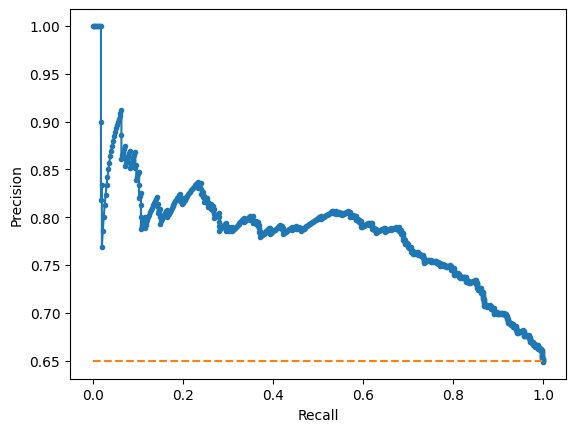

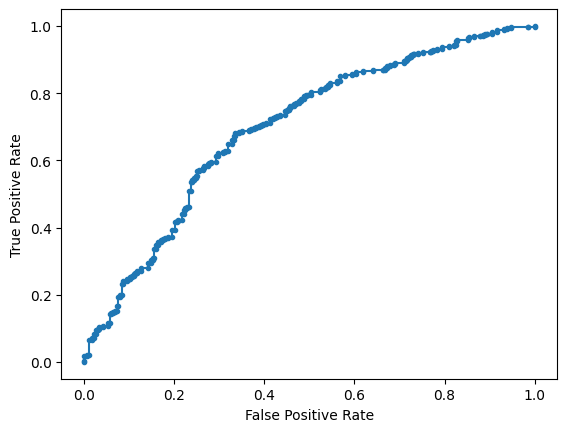

Accuracy: 68.94% Precision: 74.00% Recall: 80.41%
F1: 77.08% MCC: 0.2944
AUPRC: 78.38% AUROC: 69.59%
 accuracy [68.94243641231593]
 precision [74.00379506641366]
 recall [80.41237113402062]
 F1 [77.07509881422925]
 MCC [0.2944120785922575]
 AUPRC [78.38121829210965]
 AUROC [69.59471157629653]

Training # 2 3
2023-05-01 21:38:12.505111
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/h1.2.3.validation_genes.txt
Discriminator is GMM
Means [0.2951937449150008, -1.5753274791293]
Variances [1.51179715 1.61458422]
Priors [0.58929247 0.41070753]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
Train 1:0 1879:1109 62.88%
Computed class weights: {0: 1.3471596032461677, 1: 0.7951037786056413}
Valid 1:0 477:270 63.86%
FIT


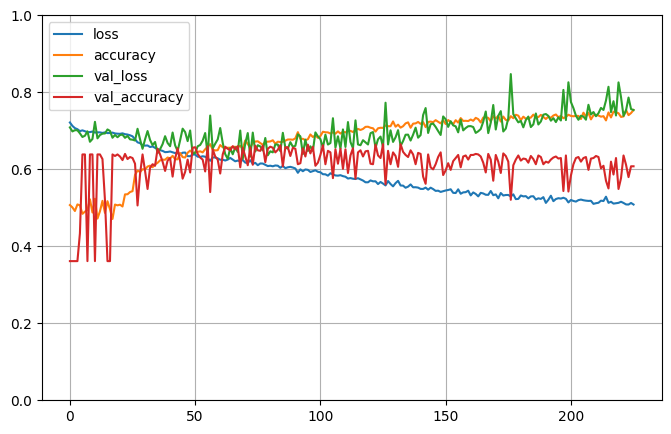

Saved model 1 to /content/drive/My Drive/data/Localization/Models/hESC_mlp.2.3.model
Saved model 2 to /content/drive/My Drive/data/Localization/Models/hESC_gmm.2.3.pickle

Testing # 2 3
2023-05-01 21:39:45.637402
PREDICT
Test 1:0 477:270 63.86%
Predict 1:0 541:206 72.42%
Test sizes (747, 1025) (747,)
Distrib of scores: 0.6223645 mean 0.21484315 std
Range of scores: 0.038098093 to 0.9795494
Score threshold 0.5
Confusion matrix
 [[113 157]
 [ 93 384]]
Normalized matrix
 [[0.15127175 0.21017403]
 [0.12449799 0.51405622]]
Extreme scores correct, pos:neg 279 52
Extreme scores incorrect pos:neg 96 46


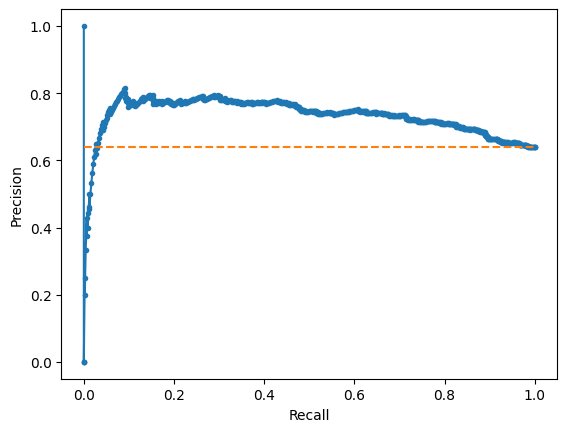

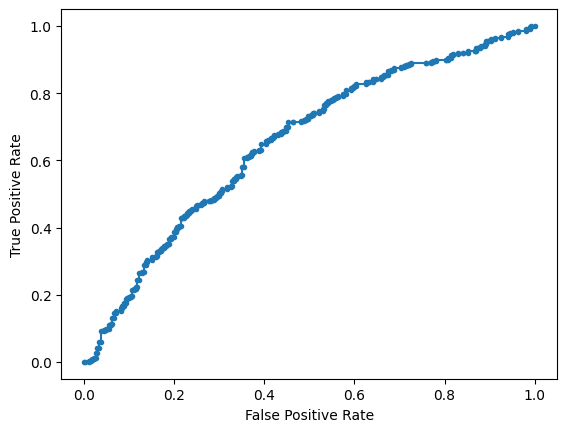

Accuracy: 66.53% Precision: 70.98% Recall: 80.50%
F1: 75.44% MCC: 0.2403
AUPRC: 73.13% AUROC: 65.22%
 accuracy [66.53279785809906]
 precision [70.97966728280961]
 recall [80.50314465408806]
 F1 [75.44204322200393]
 MCC [0.24031641419538155]
 AUPRC [73.1334554247058]
 AUROC [65.21546703936642]

Training # 2 4
2023-05-01 21:39:46.151132
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/h1.2.4.validation_genes.txt
Discriminator is GMM
Means [0.3155313167692415, -1.560566355696545]
Variances [1.47948786 1.64008488]
Priors [0.59985211 0.40014789]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
Train 1:0 1924:1064 64.39%
Computed class weights: {0: 1.4041353383458646, 1: 0.7765072765072765}
Valid 1:0 446:301 59.71%
FIT


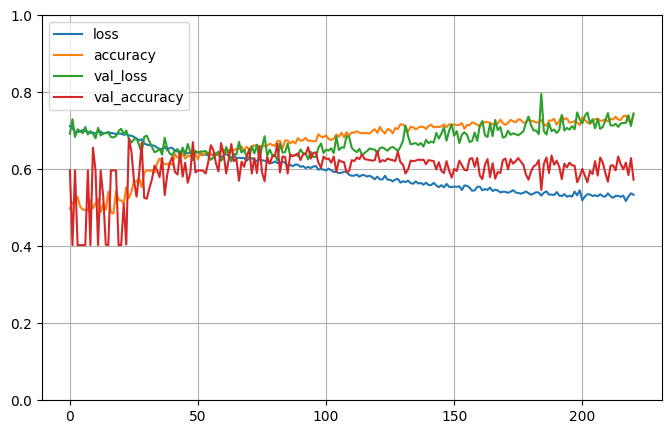

Saved model 1 to /content/drive/My Drive/data/Localization/Models/hESC_mlp.2.4.model
Saved model 2 to /content/drive/My Drive/data/Localization/Models/hESC_gmm.2.4.pickle

Testing # 2 4
2023-05-01 21:41:18.416398
PREDICT
Test 1:0 446:301 59.71%
Predict 1:0 485:262 64.93%
Test sizes (747, 1025) (747,)
Distrib of scores: 0.5794201 mean 0.20723975 std
Range of scores: 0.031751376 to 0.9587372
Score threshold 0.5
Confusion matrix
 [[150 151]
 [112 334]]
Normalized matrix
 [[0.20080321 0.2021419 ]
 [0.14993307 0.44712182]]
Extreme scores correct, pos:neg 231 80
Extreme scores incorrect pos:neg 88 45


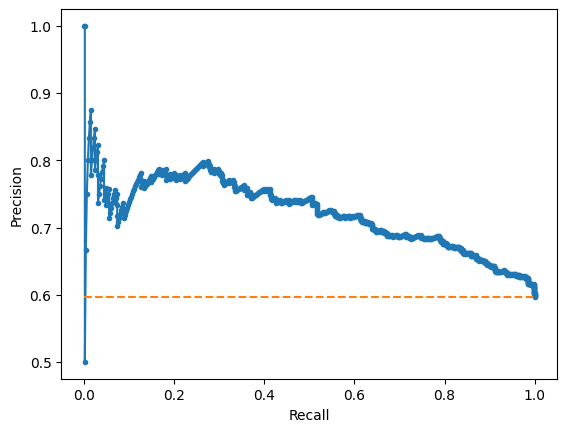

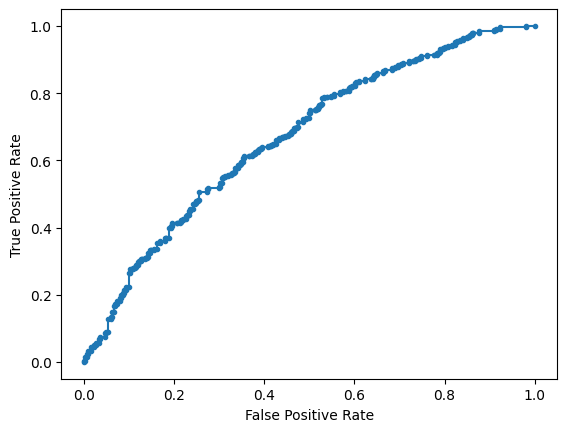

Accuracy: 64.79% Precision: 68.87% Recall: 74.89%
F1: 71.75% MCC: 0.2541
AUPRC: 72.14% AUROC: 66.93%
 accuracy [64.79250334672021]
 precision [68.8659793814433]
 recall [74.88789237668162]
 F1 [71.75080558539206]
 MCC [0.25410247156812515]
 AUPRC [72.14017977749438]
 AUROC [66.92713376934881]

Training # 2 5
2023-05-01 21:41:19.139744
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/h1.2.5.validation_genes.txt
Discriminator is GMM
Means [0.32342867976253803, -1.5282615844893361]
Variances [1.45398884 1.62934017]
Priors [0.575183 0.424817]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
Train 1:0 1832:1156 61.31%
Computed class weights: {0: 1.292387543252595, 1: 0.8155021834061136}
Valid 1:0 469:278 62.78%
FIT


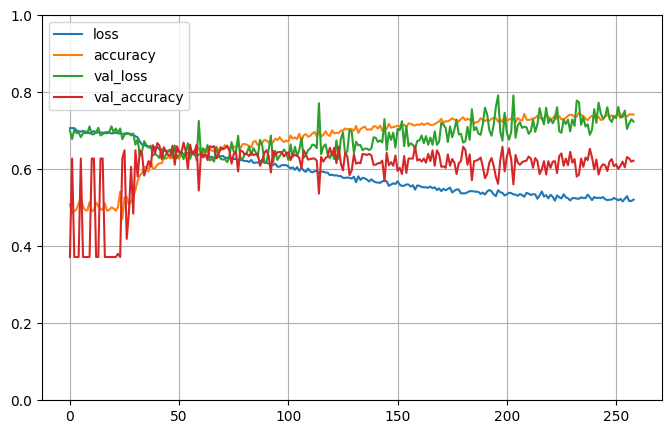

Saved model 1 to /content/drive/My Drive/data/Localization/Models/hESC_mlp.2.5.model
Saved model 2 to /content/drive/My Drive/data/Localization/Models/hESC_gmm.2.5.pickle

Testing # 2 5
2023-05-01 21:43:07.729595
PREDICT
Test 1:0 469:278 62.78%
Predict 1:0 517:230 69.21%
Test sizes (747, 1025) (747,)
Distrib of scores: 0.6095096 mean 0.22741425 std
Range of scores: 0.022552757 to 0.971224
Score threshold 0.5
Confusion matrix
 [[127 151]
 [103 366]]
Normalized matrix
 [[0.17001339 0.2021419 ]
 [0.13788487 0.48995984]]
Extreme scores correct, pos:neg 282 67
Extreme scores incorrect pos:neg 105 49


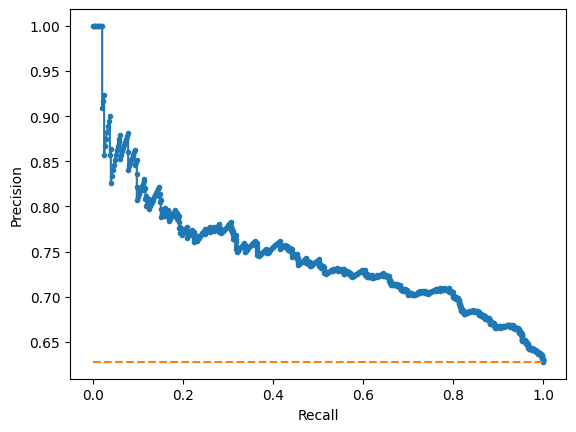

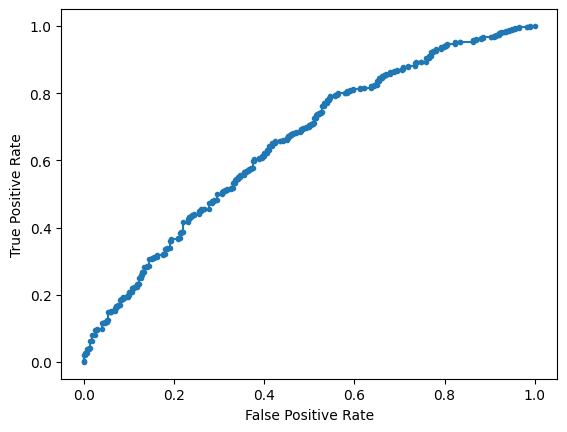

Accuracy: 66.00% Precision: 70.79% Recall: 78.04%
F1: 74.24% MCC: 0.2484
AUPRC: 74.57% AUROC: 65.25%
 accuracy [65.99732262382865]
 precision [70.79303675048357]
 recall [78.03837953091684]
 F1 [74.23935091277892]
 MCC [0.2483978712769715]
 AUPRC [74.57233913885595]
 AUROC [65.24827046678223]
2023-05-01 21:43:08.471223


In [7]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator('h1')  # use files like h1.1.1.validation_genes.txt
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                model,discrim = cvdo.get_models()
                save_model(model,discrim,filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            if LOAD_MODEL_FILENAME is not None:
                filename1 = LOAD_MODEL_FILENAME
                filename2 = LOAD_DESCRIM_FILENAME
                model, descrim = load_model(filename1, filename2)
                cvdo.set_models(model, descrim)
            else:
                cvdo.train_new_model(
                    train_allids,train_allseq,train_gene_to_rci,
                    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [8]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 66.48% std 1.59
 precision mean 70.94% std 1.74
 recall mean 78.93% std 2.79
 F1 mean 74.70% std 1.67
 MCC mean 0.2569 std 0.0315
 AUPRC mean 74.83% std 2.34
 AUROC mean 66.63% std 2.37
 accuracy [[66.93440428380187], [64.12315930388219], [69.07630522088354], [65.72958500669344], [66.80053547523427], [65.86345381526104], [68.94243641231593], [66.53279785809906], [64.79250334672021], [65.99732262382865]]
 precision [[73.44398340248964], [69.8076923076923], [72.11009174311927], [69.49152542372882], [70.55449330783938], [69.39890710382514], [74.00379506641366], [70.97966728280961], [68.8659793814433], [70.79303675048357]]
 recall [[74.84143763213531], [76.58227848101265], [83.26271186440678], [79.6976241900648], [79.6976241900648], [81.41025641025641], [80.41237113402062], [80.50314465408806], [74.88789237668162], [78.03837953091684]]
 F1 [[74.13612565445027], [73.03822937625756], [77.28613569321534], [74.24547283702213], [74.84787018255578], [74.92625368731564], [77.075098